<h1>Composite Image</h1>
<h2>Question :</h2>
<p>Using basic image operations combine the scene and object image to get the composite image as shown below. (Use img61.jpg, sample.jpg images)</p>

<h3>Import Libraries</h3>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3>Procedure</h3>  
<ol>  
    <li>Load the scene (background) and the sample (foreground) images.</li>  
    <li>Ensure both images have the same dimensions.</li>  
    <li>Define a range to detect near-white pixels in the sample image.</li>  
    <li>Create a mask to identify object pixels (non-white areas in the sample).</li>  
    <li>Set the corresponding object pixel locations in the scene to black.</li>  
    <li>Convert the white background of the sample image to black.</li>  
    <li>Add the modified scene and sample images to generate the composite image.</li>  
    <li>Display all intermediate steps using Matplotlib.</li>  
    <li>Save the final composite image.</li>  
</ol>  

<h4>1. Load the scene (background) and the sample (foreground) images</h4>

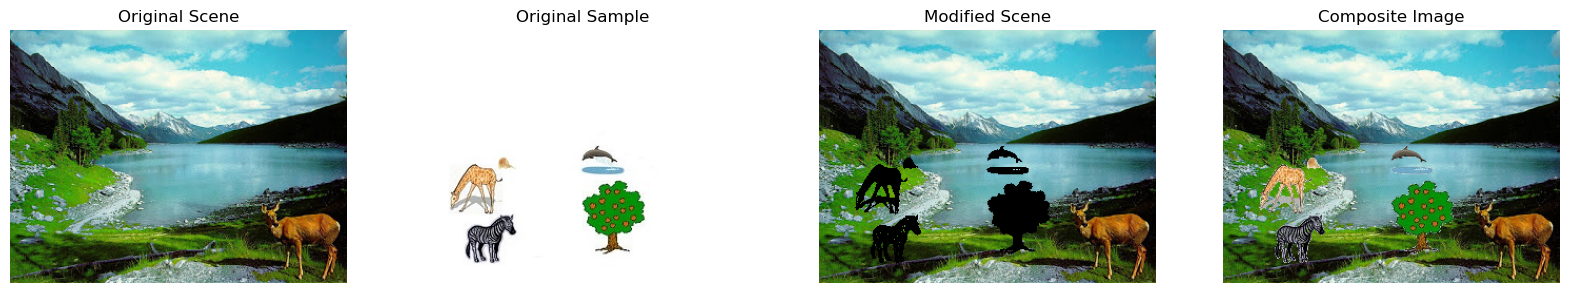

Composite image saved as composite.jpg


In [32]:
import cv2
import numpy as np

def create_composite_image(scene_path, sample_path, output_path):
    # Load images
    scene = cv2.imread(scene_path, cv2.IMREAD_COLOR)
    sample = cv2.imread(sample_path, cv2.IMREAD_COLOR)
    
    # Ensure both images have the same size
    if scene.shape != sample.shape:
        raise ValueError("Scene and sample images must have the same dimensions")
    
    # Define a range for detecting white (allowing slight variations)
    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)
    
    # Create a mask where sample is not white (i.e., object pixels)
    object_mask = np.any(sample < lower_white, axis=-1)  # True for object pixels, False for background
    
    # Make scene black where object is present in sample
    scene_modified = scene.copy()
    scene_modified[object_mask] = 0
    
    # Convert white background of sample to black
    sample_modified = sample.copy()
    white_mask = cv2.inRange(sample, lower_white, upper_white)
    sample_modified[white_mask > 0] = 0
    
    # Add the modified scene and sample images to get the composite image
    composite = cv2.add(scene_modified, sample_modified)
    
    # Plot all intermediate images
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(cv2.cvtColor(scene, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Scene")
    axs[0].axis("off")
    
    axs[1].imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Original Sample")
    axs[1].axis("off")
    
    axs[2].imshow(cv2.cvtColor(scene_modified, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Modified Scene")
    axs[2].axis("off")
    
    axs[3].imshow(cv2.cvtColor(composite, cv2.COLOR_BGR2RGB))
    axs[3].set_title("Composite Image")
    axs[3].axis("off")
    
    plt.show()
    
    # Save the composite image
    cv2.imwrite(output_path, composite)
    print(f"Composite image saved as {output_path}")

# Example usage
create_composite_image("img61.jpg", "Sample_Image.jpg", "composite.jpg")